#### Calling packages from required libraries

In [74]:
import pymongo as mongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns 
%matplotlib inline

In [63]:
os.getcwd()

'C:\\Users\\megal\\Desktop\\Regis\\MSDS610\\Week4'

In [64]:
os.chdir('C:/Users/megal/Desktop/Regis/MSDS610/Week4')

#### Defining function to connect with MongoDB

In [65]:
client = MongoClient()
db = client['LA_Traffic']
tickets = db['LA_Traffic_Citations']

#### Locating random example

In [66]:
tickets.find_one()

{'_id': ObjectId('6202a6fc6d30fb9e60290dd4'),
 'Ticket number': '1103341116',
 'Issue Date': '2015-12-21T00:00:00.000',
 'Issue time': '1251',
 'RP State Plate': 'CA',
 'Plate Expiry Date': '200304',
 'Make': 'HOND',
 'Body Style': 'PA',
 'Color': 'GY',
 'Location': '13147 WELBY WAY',
 'Route': '01521',
 'Agency': '1',
 'Violation code': '4000A1',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Fine amount': '50',
 'Latitude': '99999',
 'Longitude': '99999'}

In [67]:
registration_tickets_makes = tickets.find({'Violation Description': {'$eq': 'NO EVIDENCE OF REG'}}).limit(10)

In [68]:
df = pd.json_normalize(registration_tickets_makes)

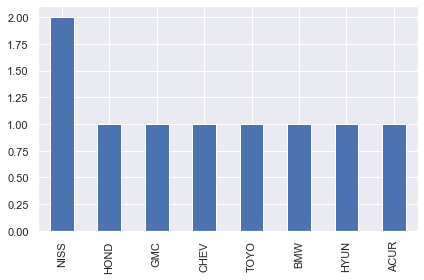

In [69]:
ax = df['Make'].value_counts()[:20].plot.bar()
plt.tight_layout()

In [70]:
fig = ax.get_figure()
fig.savefig('make_barplot.jpg')

In [113]:
df3 = tickets.find().sort("Fine amout", -1).limit(10)

In [114]:
df3 = pd.json_normalize(df3)

In [117]:
print(df3)

                        _id Ticket number               Issue Date Issue time  \
0  6202a6fc6d30fb9e60290ddd    1106506413  2015-12-22T00:00:00.000       1100   
1  6202a6fc6d30fb9e60290dd8    1105461453  2015-09-15T00:00:00.000        115   
2  6202a6fc6d30fb9e60290ddb    1106500463  2015-12-17T00:00:00.000       1710   
3  6202a6fc6d30fb9e60290dd9    1106226590  2015-09-15T00:00:00.000         19   
4  6202a6fc6d30fb9e60290dd7    1104820732  2015-12-26T00:00:00.000       1515   
5  6202a6fc6d30fb9e60290dd5    1103700150  2015-12-21T00:00:00.000       1435   
6  6202a6fc6d30fb9e60290dd4    1103341116  2015-12-21T00:00:00.000       1251   
7  6202a6fc6d30fb9e60290dd6    1104803000  2015-12-21T00:00:00.000       2055   
8  6202a6fc6d30fb9e60290dda    1106500452  2015-12-17T00:00:00.000       1710   

  RP State Plate Plate Expiry Date  Make Body Style Color            Location  \
0             CA            201701  NISS         PA    SI     1159 HUNTLEY DR   
1             CA           

In [71]:
df2 = tickets.find({'RP State Plate': {'$ne': 'CA'}})

In [72]:
df2 = pd.json_normalize(df2)

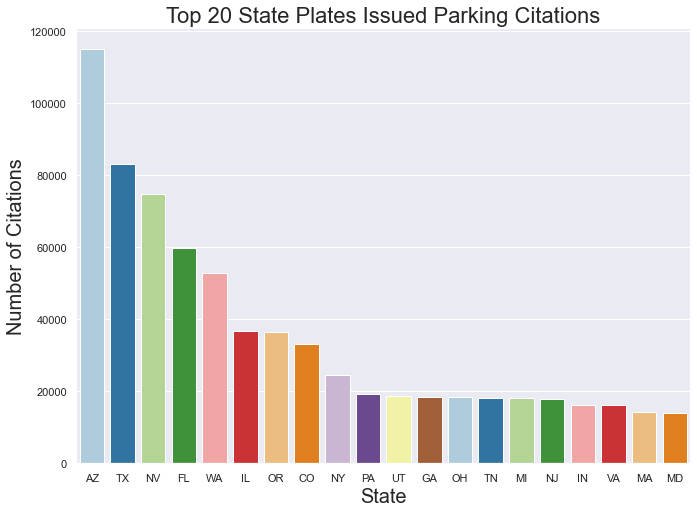

In [73]:
sns.set(style="darkgrid")
state_plate_count  = df2['RP State Plate'].value_counts()
state_plate_count = state_plate_count[:20,]
plt.figure(figsize=(11,8))
sns.barplot(state_plate_count.index, state_plate_count.values, alpha=1,palette=("Paired"))
plt.title('Top 20 State Plates Issued Parking Citations', fontsize=22)
plt.xlabel('State', size="20")
plt.ylabel('Number of Citations', size="20")
plt.show()